<a href="https://colab.research.google.com/github/laugustovieira/imunizacao/blob/main/imunizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definição da Análise

* Comportamento da cobertura vacinal no Brasil durante os anos de 1994 a 2021
* Comportamento da cobertura vacinal nas Unidades da Federação durante os anos de 1994 a 2021
 



#Preparação dos Dados

#Importação de Bibliotecas

In [1166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

## Carregando Arquivos para Análise

In [1123]:
dados = pd.read_csv("https://raw.githubusercontent.com/laugustovieira/imunizacao/main/dados/coberturaVacinalPorAnoBCG.csv",encoding="ISO-8859-1",
            sep=";",  thousands= ".", decimal=",", engine= "python")
dados.head()

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,11 Rondônia,93.86,101.12,104.31,120.42,122.22,113.72,111.60,114.36,102.43,97.42,106.60,109.69,121.15,114.13,105.86,107.64,102.79,105.79,106.12,108.15,110.07,110.77,104.90,97.81,93.61,88.11,70.72,57.17,104.31
1,12 Acre,61.01,110.92,84.33,95.83,99.73,97.32,112.32,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,34.24,104.25
2,13 Amazonas,41.00,88.38,112.77,109.65,108.68,117.20,118.46,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,65.35,107.74
3,14 Roraima,99.64,129.05,126.51,129.41,122.06,137.46,187.41,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,98.07,62.11,113.01
4,15 Pará,84.18,107.88,107.83,118.54,85.43,100.51,103.54,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,45.74,109.30


##Tratando os Dados

In [1124]:
#definindo as cores para os estados
colors2 = {
'31 Minas Gerais': '#E00000', '15 Pará': '#E05200', '29 Bahia': '#E0A100', '32 Espírito Santo': '#E0CA00',
 '35 São Paulo': '#7FE000', '51 Mato Grosso': '#00E0B7', '22 Piauí': '#00BBE0', '16 Amapá': '#008AE0',
 '21 Maranhão': '#8700E0', '33 Rio de Janeiro': '#BB00E0', '52 Goiás': '#E0008E', '17 Tocantins': '#9D4343',
 '27 Alagoas': '#9D8E43', '13 Amazonas': '#5B9D43', '28 Sergipe': '#439D88', '26 Pernambuco': '#CE9F69',
 '11 Rondônia': '#B8CE69', '23 Ceará': '#69CE82', '25 Paraíba': '#9B7DBA', '50 Mato Grosso do Sul': '#B2A2C3',
 '41 Paraná': '#575757', '24 Rio Grande do Norte': '#693535', '53 Distrito Federal': '#762828', '42 Santa Catarina': '#AFA0DA',
 '12 Acre': '#312258', '14 Roraima': '#120D21', '43 Rio Grande do Sul': '#0A0A0A'
}
color_regiao = {
'Norte': '#E00000', 'Nordeste': '#E05200', 'Suldeste': '#E0A100', 'Sul': '#E0CA00',
 'CentroOeste': '#7FE000'
}

In [1125]:
dados.index

RangeIndex(start=0, stop=28, step=1)

In [1126]:
dados = dados.set_index("Unidade da Federação")
dados.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,93.86,101.12,104.31,120.42,122.22,113.72,111.60,114.36,102.43,97.42,106.60,109.69,121.15,114.13,105.86,107.64,102.79,105.79,106.12,108.15,110.07,110.77,104.90,97.81,93.61,88.11,70.72,57.17,104.31
12 Acre,61.01,110.92,84.33,95.83,99.73,97.32,112.32,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,34.24,104.25
13 Amazonas,41.00,88.38,112.77,109.65,108.68,117.20,118.46,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,65.35,107.74
14 Roraima,99.64,129.05,126.51,129.41,122.06,137.46,187.41,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,98.07,62.11,113.01
15 Pará,84.18,107.88,107.83,118.54,85.43,100.51,103.54,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,45.74,109.30


In [1127]:
dados_ano = dados.T[0:28]
dados_ano.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal,Total
2017,97.81,96.83,93.82,116.74,85.83,93.89,104.75,105.69,93.94,109.59,67.22,104.00,97.25,110.92,98.50,86.96,94.81,91.93,115.38,100.95,96.31,87.04,91.29,122.81,96.61,88.67,93.61,97.98
2018,93.61,100.93,96.97,135.55,87.65,102.95,104.06,105.11,97.90,104.89,107.70,105.35,106.53,112.92,106.33,84.27,100.85,99.98,105.72,101.28,97.93,92.72,90.98,129.56,106.14,93.58,89.50,99.72
2019,88.11,93.86,93.27,115.88,83.06,100.27,112.41,83.57,82.58,86.05,85.29,94.90,92.07,91.54,85.41,78.05,88.76,90.10,79.62,83.78,91.19,83.43,87.83,114.25,90.11,86.73,93.24,86.67
2020,70.72,70.09,88.17,98.07,68.34,71.57,89.69,64.03,76.15,65.56,77.52,63.58,76.29,67.23,70.51,74.83,81.50,77.34,60.03,67.21,88.49,79.94,81.81,61.55,83.46,78.00,90.56,73.40
2021,57.17,34.24,65.35,62.11,45.74,15.43,66.04,42.63,58.36,43.39,54.12,29.29,56.39,48.34,40.00,42.00,61.12,62.47,46.65,50.50,67.20,54.73,62.18,42.14,62.65,61.02,80.45,52.74


In [1128]:
dados = dados.drop(columns=[" Total"])
dados = dados[0:27]
dados.tail()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,0.00,102.81,96.65,106.21,102.25,110.23,102.88,104.48,103.68,103.81,101.99,103.22,102.08,100.32,98.94,99.16,96.44,101.20,101.24,110.88,105.10,103.74,94.42,91.29,90.98,87.83,81.81,62.18
50 Mato Grosso do Sul,0.00,0.00,101.50,120.67,113.70,114.96,121.58,120.00,114.94,108.05,99.81,102.71,104.31,105.88,102.39,104.29,105.23,107.48,105.36,113.25,129.71,129.60,106.14,122.81,129.56,114.25,61.55,42.14
51 Mato Grosso,78.75,100.39,98.14,119.89,112.27,107.83,113.33,115.54,112.31,108.02,111.56,113.86,111.97,117.62,112.73,111.47,98.65,105.01,107.44,106.72,111.78,109.26,96.55,96.61,106.14,90.11,83.46,62.65
52 Goiás,56.81,115.33,108.30,108.98,105.67,108.16,108.76,110.42,112.81,111.28,121.32,116.34,117.71,119.46,119.52,115.63,118.33,120.18,112.78,116.43,115.49,105.30,92.31,88.67,93.58,86.73,78.00,61.02
53 Distrito Federal,0.00,1.70,136.31,146.75,159.36,162.78,128.74,122.91,116.89,115.71,115.74,109.26,112.04,106.67,107.92,111.11,113.36,98.39,106.51,133.19,113.52,78.27,138.11,93.61,89.50,93.24,90.56,80.45


In [1129]:
#mapeando as regiões do brasil
regiao = {"11 Rondônia": "Norte",
          "12 Acre": "Norte",
          "13 Amazonas":"Norte",
          "14 Roraima":"Norte",
          "15 Pará":"Norte",
          "16 Amapá":"Norte",
          "17 Tocantins":"Norte",
          "21 Maranhão":"Nordeste",
          "22 Piauí":"Nordeste",
          "23 Ceará":"Nordeste",
          "24 Rio Grande do Norte":"Nordeste",
          "25 Paraíba":"Nordeste",
          "26 Pernambuco":"Nordeste",
          "27 Alagoas":"Nordeste",
          "28 Sergipe":"Nordeste",
          "29 Bahia":"Nordeste",
          "31 Minas Gerais":"Suldeste",
          "32 Espírito Santo":"Suldeste",
          "33 Rio de Janeiro":"Suldeste",
          "35 São Paulo":"Suldeste",
          "41 Paraná":"Sul",
          "42 Santa Catarina":"Sul",
          "43 Rio Grande do Sul":"Sul",
          "50 Mato Grosso do Sul":"CentroOeste",
          "51 Mato Grosso":"CentroOeste",
          "52 Goiás":"CentroOeste",
          "53 Distrito Federal":"CentroOeste"}

In [1130]:
dados_estados_regiao = dados[0:]

In [1131]:
dados_estados_regiao.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,93.86,101.12,104.31,120.42,122.22,113.72,111.60,114.36,102.43,97.42,106.60,109.69,121.15,114.13,105.86,107.64,102.79,105.79,106.12,108.15,110.07,110.77,104.90,97.81,93.61,88.11,70.72,57.17
12 Acre,61.01,110.92,84.33,95.83,99.73,97.32,112.32,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,34.24
13 Amazonas,41.00,88.38,112.77,109.65,108.68,117.20,118.46,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,65.35
14 Roraima,99.64,129.05,126.51,129.41,122.06,137.46,187.41,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,98.07,62.11
15 Pará,84.18,107.88,107.83,118.54,85.43,100.51,103.54,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,45.74


In [1132]:
dados_estados_regiao["regiao"] = dados_estados_regiao.index.map(regiao)
dados_estados_regiao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,93.86,101.12,104.31,120.42,122.22,113.72,111.60,114.36,102.43,97.42,106.60,109.69,121.15,114.13,105.86,107.64,102.79,105.79,106.12,108.15,110.07,110.77,104.90,97.81,93.61,88.11,70.72,57.17,Norte
12 Acre,61.01,110.92,84.33,95.83,99.73,97.32,112.32,134.96,132.91,121.07,116.13,110.46,116.02,122.55,108.57,109.37,114.23,109.63,105.00,106.16,104.59,105.90,99.23,96.83,100.93,93.86,70.09,34.24,Norte
13 Amazonas,41.00,88.38,112.77,109.65,108.68,117.20,118.46,108.31,107.78,109.89,118.64,130.49,127.52,125.35,121.18,120.83,115.98,117.27,124.16,116.92,120.39,110.79,95.87,93.82,96.97,93.27,88.17,65.35,Norte
14 Roraima,99.64,129.05,126.51,129.41,122.06,137.46,187.41,104.68,116.91,105.42,97.50,107.16,115.45,103.53,95.06,101.81,113.21,115.06,118.08,94.17,103.97,110.55,107.95,116.74,135.55,115.88,98.07,62.11,Norte
15 Pará,84.18,107.88,107.83,118.54,85.43,100.51,103.54,118.34,127.04,122.87,128.59,146.91,140.16,136.53,127.68,128.81,124.65,120.12,113.62,117.68,114.80,94.87,81.62,85.83,87.65,83.06,68.34,45.74,Norte


In [1133]:
dados_regiao = dados_estados_regiao.set_index("regiao")
dados_regiao_aberto = dados_regiao.reset_index().melt(id_vars=["regiao"], value_vars = dados_regiao.columns)
dados_regiao_aberto.columns = ["regiao","ano", "cv"]
dados_regiao_aberto.head()

,regiao,ano,cv
0,Norte,1994,93.86
1,Norte,1994,61.01
2,Norte,1994,41.00
3,Norte,1994,99.64
4,Norte,1994,84.18


In [1134]:
dados_regiao_aberto_agrupado = dados_regiao_aberto.groupby(["regiao", "ano"]).mean().reset_index()
dados_regiao_aberto_agrupado.tail()

,regiao,ano,cv
135,Suldeste,2017,100.7675
136,Suldeste,2018,101.9575
137,Suldeste,2019,85.5650
138,Suldeste,2020,71.5200
139,Suldeste,2021,55.1850


In [1156]:
def plotar_estados(nome_regiao):
  dados_reg = dados_estados_regiao.query("regiao == @nome_regiao")  
  dados_reg = dados_reg[dados_reg.columns[0:28]] 
  ax = dados_reg.T.plot(figsize=(16,8), color= colors2)
  plt.xlabel("Anos", size=15)
  plt.ylabel("Índice de Cobertura Vacinal", size=15)
  plt.title("Comportamento Anual do Índice de Cobertura Vacinal da Região {} do Brasil para BCG".format(nome_regiao), size=20)
  plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
  plt.legend(bbox_to_anchor=(1,1),prop={'size':15}) 
  #criando a grid
  plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
  eixo_x = dados.T.index.tolist()
  ax.set_xticks(range(len(eixo_x)))
  ax.set_xticklabels(eixo_x)
  plt.ylim(0,200)
  plt.show()

In [1160]:
def plotar_regiao(nome_regiao):
  dados_reg = dados_regiao_aberto_agrupado.query("regiao == @nome_regiao")   
  plt.figure(figsize=(16,8))
  ax = sns.barplot(data = dados_reg, x = "ano", y="cv", hue="cv", dodge=False,palette = sns.set_palette("rocket_r",29))
  plt.xlabel("Anos", size=15)
  plt.ylabel("Índice de Cobertura Vacinal", size=15)
  plt.title("Comportamento Anual do Índice de Cobertura Vacinal da Região {} do Brasil para BCG".format(nome_regiao), size=20)
  plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
  plt.legend(bbox_to_anchor=(1,1),prop={'size':15}) 
  plt.ylim(0,200)
  plt.legend("")
  plt.show()

#Brasil
Analisando os dados totais de cobertura vacinal para BCG no âmbito Brasil, percebe-se que a partir de 2015 incia-se uma queda no indice de cobertura vacinal. Em 2019 prticamente volta para o índice de 1994.
De 2019 para 2020 continua caindo o índice. 
O gráfico abaixo mostra nas cores mais intensas, os índices anos que tiveram maior índice de cobertura vacinal no Brasil. AS cores mais claras percebe-se o contrário

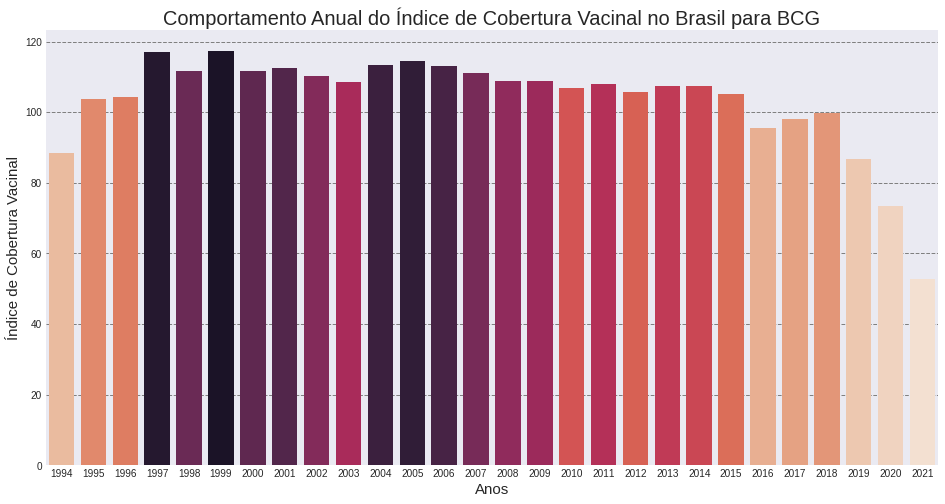

In [1137]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data = dados_ano, x = dados_ano.index, y="Total", hue = "Total", dodge = False, palette = sns.set_palette("rocket_r",29))
plt.legend("")
plt.xlabel("Anos", size=15)
plt.ylabel("Índice de Cobertura Vacinal", size=15)
plt.title("Comportamento Anual do Índice de Cobertura Vacinal no Brasil para BCG", size=20)
plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
plt.show()

Segundo o Minitério da Saúde o índice ideal de cobertura vacianal para BCG é de 95%. Percebe-se clarament que a partir de 2018 este índice tende a cair ficando abaixo do ideal.

Programa Nacional de Imunizações do Sistema Único de Saúde é considerado um dos mais amplos e bem sucedidos do mundo

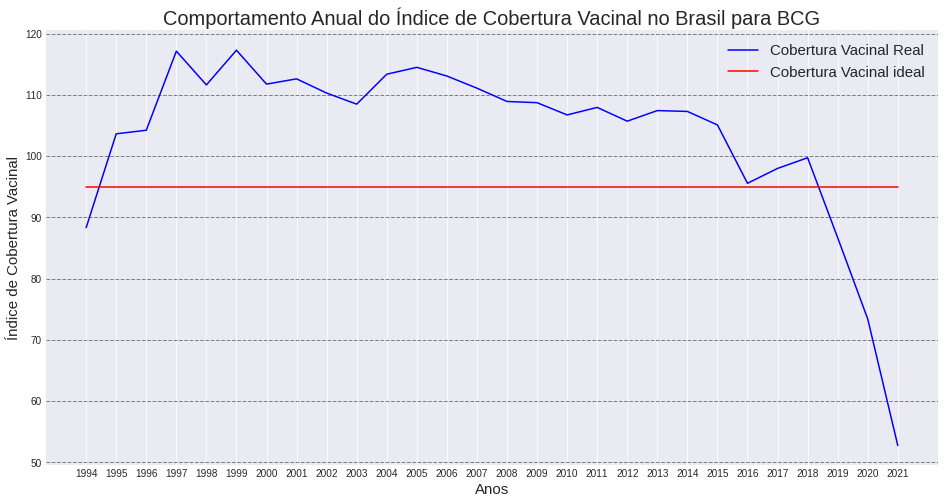

In [1138]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data = dados_ano, x = dados_ano.index, y="Total", color="blue", markers=True)
ax = sns.lineplot(data = dados_ano, x = dados_ano.index, y=95, color="red", markers=True)
plt.xlabel("Anos", size=15)
plt.ylabel("Índice de Cobertura Vacinal", size=15)
plt.title("Comportamento Anual do Índice de Cobertura Vacinal no Brasil para BCG", size=20)
plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
plt.legend(labels=["Cobertura Vacinal Real","Cobertura Vacinal ideal"], prop={'size':15})

plt.show()

#Unidades da Federação
Analisando o comportamento das Unidade da Federação percebe-se queem 2001 o Piauí tem o maior índice de combertura vacinal.
Percebe-se que a partir de 2018 existe uma queda do indice para todo os estados brasileiros.

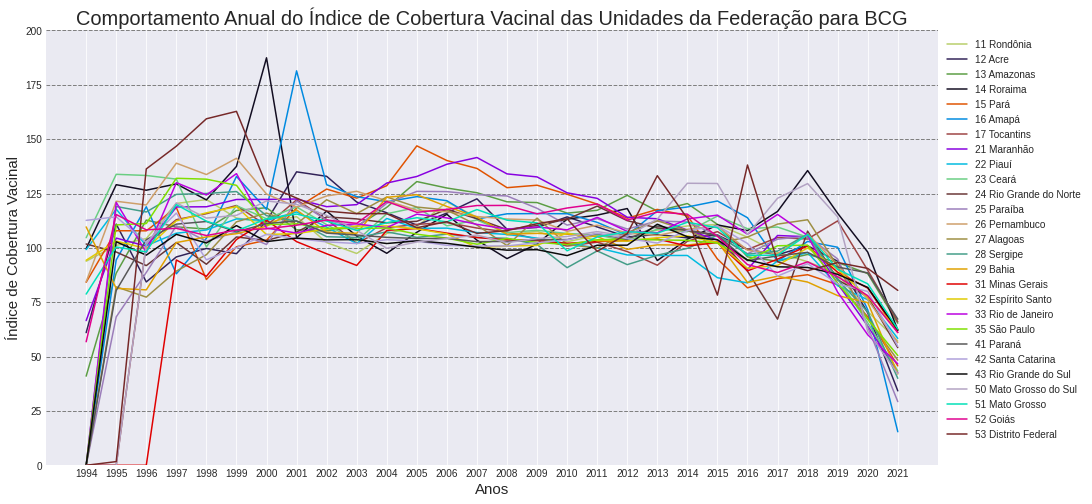

In [1139]:

ax = dados.T.plot(figsize=(16,8), color=colors2)
plt.legend(bbox_to_anchor=(1,1)) 
plt.xlabel("Anos", size=15)
plt.ylabel("Índice de Cobertura Vacinal", size=15)
plt.title("Comportamento Anual do Índice de Cobertura Vacinal das Unidades da Federação para BCG", size=20)
plt.grid(True, axis="y")

#criando a grid
plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
eixo_x = dados.T.index.tolist()
ax.set_xticks(range(len(eixo_x)))
ax.set_xticklabels(eixo_x)
plt.ylim(0,200)
plt.show()

#Regiões do Brasil
Abaixo a média das regiões do brasil.Entre 1996 a 2015 o índice de cobertura vacinal das regiões brasileiras se mantém acima de 100%. A partir de 2014 começam a cair.


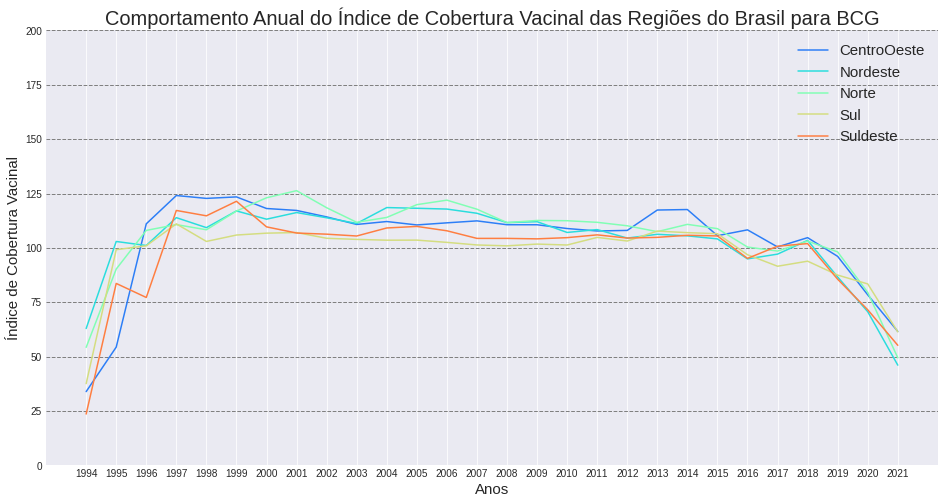

In [1140]:
plt.figure(figsize=(16,8))
sns.lineplot(data = dados_regiao_aberto_agrupado, x = "ano", y= "cv", hue="regiao", palette = "rainbow")
plt.xlabel("Anos", size=15)
plt.ylabel("Índice de Cobertura Vacinal", size=15)
plt.title("Comportamento Anual do Índice de Cobertura Vacinal das Regiões do Brasil para BCG", size=20)
plt.grid(axis='y',color='gray',linestyle='--',linewidth=1)
plt.legend(bbox_to_anchor=(1,1),prop={'size':15}) 
plt.ylim(0,200)

plt.show()

#Região Norte
A região Norte tem seu melhor índice de Cobertura Vacinal em 2001 (acima de 125). A partir de 2015 os índices passam a cair tendo um leve acrescimo em 2018 e voltando cair novamente a partir de 2018

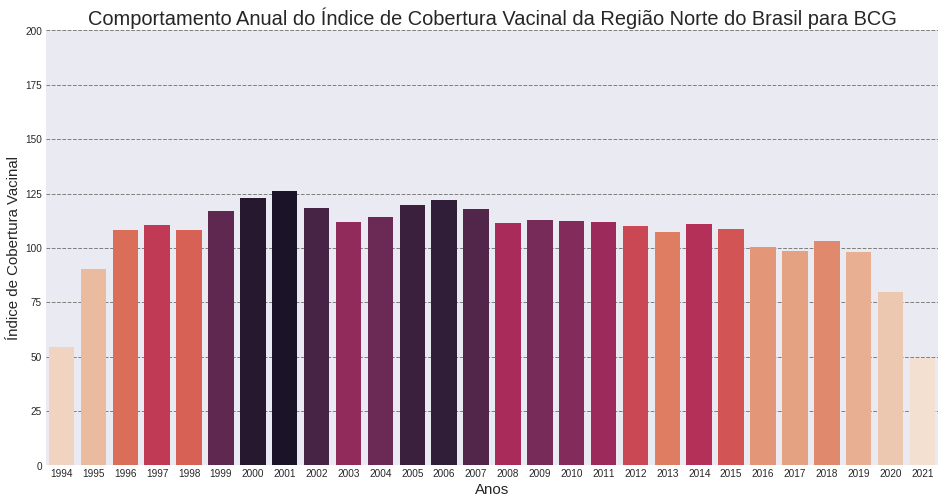

In [1145]:
plotar_regiao("Norte")

O comportamento entre os estados são homogeneos variando entre 95 a 150, porém com um inicio de queda a partir de 2014

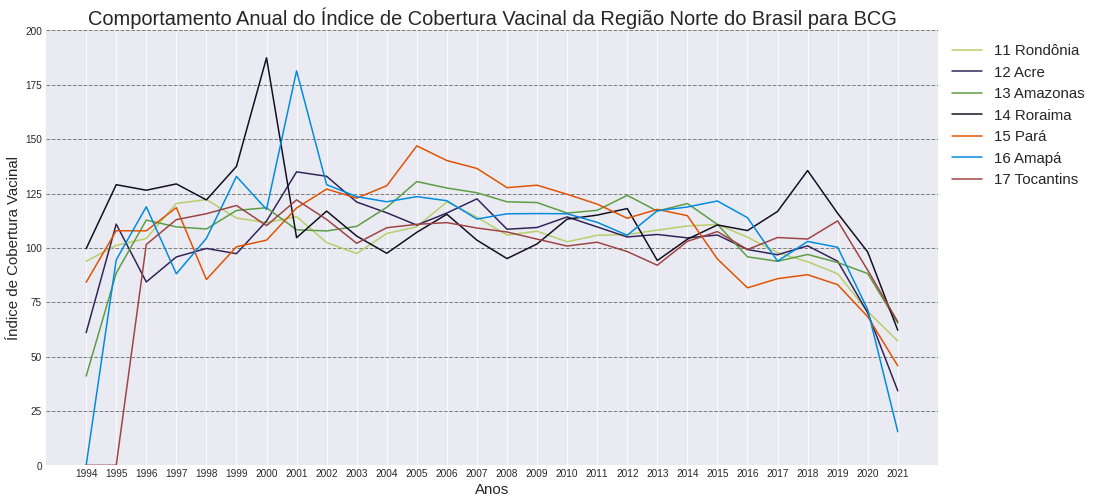

In [1144]:
plotar_estados("Norte")

#Região Suldeste
O comportamento entre os anos de 1997 a 2015 são constantes entre 100 a 125, porém a partir de 2015 o índice chega a ficar abaixo de 100 e apresentando uma tendencia de queda nos anos seguintes. 2020 fica abaixo do ano de 1995, ou seja a cobertura vacianal da BCG em 2020 está pior do que era em 1995, abaixo de 75%. Em 1999 foi o ano com maior cobertural vacinal da BCG na região Suldeste

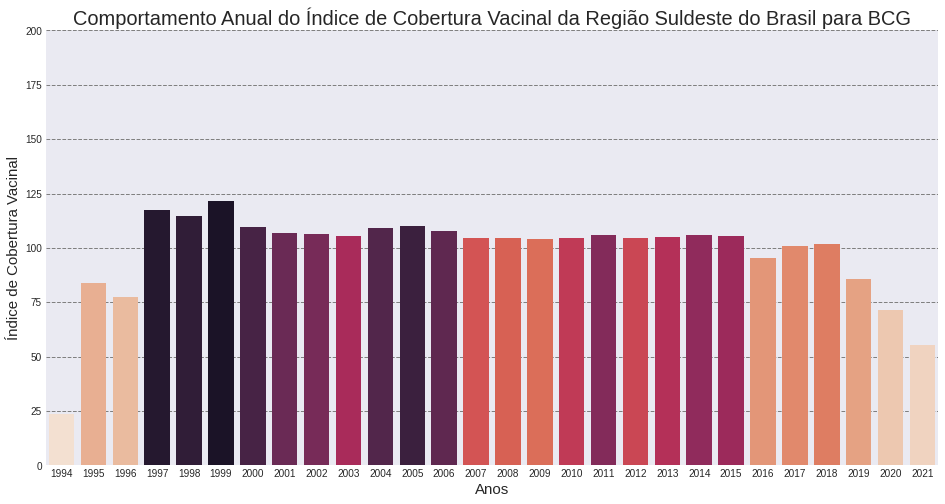

In [1161]:
plotar_regiao("Suldeste")

Abaixo percebe-se a vaiação dos estados entre 80 a 125 entre os anos de 2001 a 2015, partir de 2015 percebe uma queda.

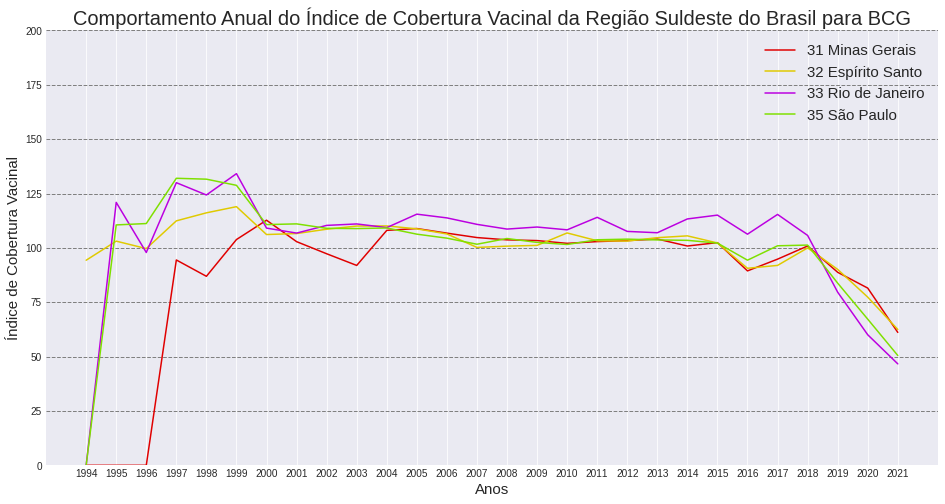

In [1146]:
plotar_estados("Suldeste")

#Região Sul
A região Sul apresenta uma média contante entre 1997 a 2016 com o índice acima de 100, porém a partir de 2016 os índices passam a cair. 1997 foi o ano com maior cobertura vacinal da BCG na região Sul.

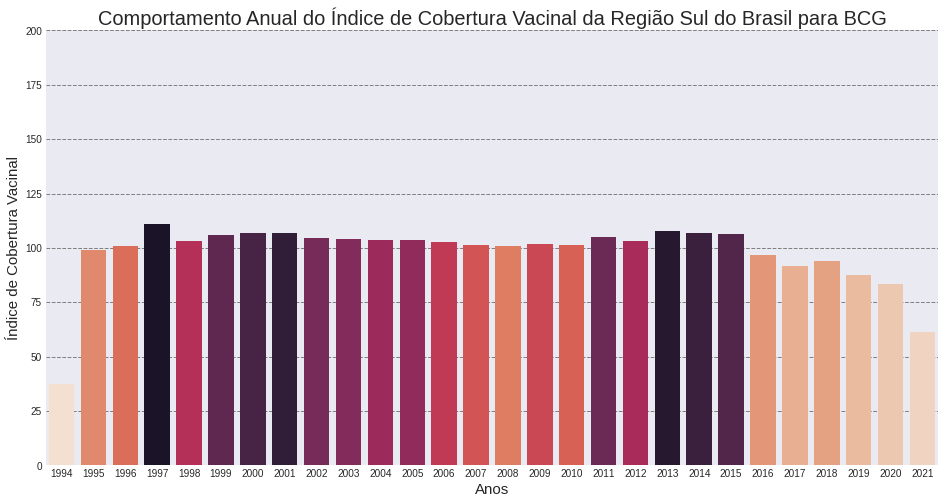

In [1149]:
plotar_regiao("Sul")

Os estados da região Sul apresentam um comportamento bem homogêneo entre 2000 a 2015. A partir desta data incial a uma queda em todos os estados da região

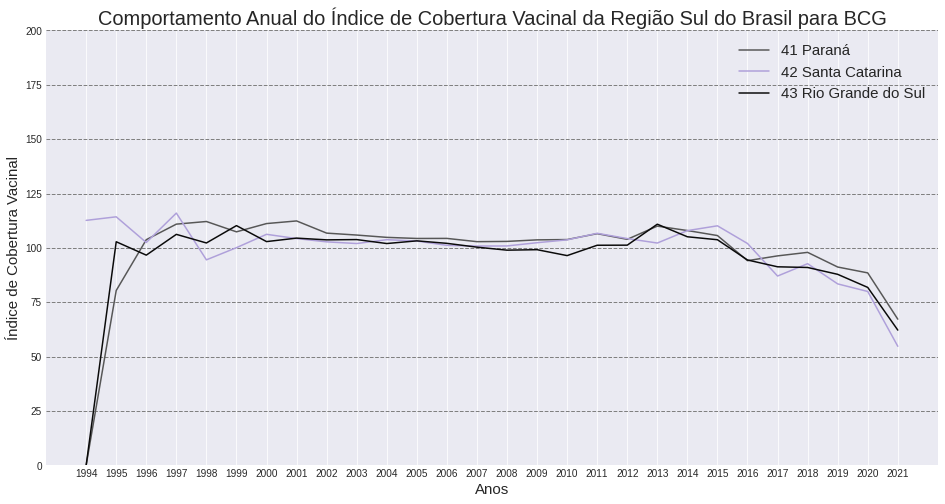

In [1148]:
plotar_estados("Sul")

#Região Nordeste
A região nordeste mantém o índice de cobertura vacianal acima de 100 entre 1995 a 2015 quando incia uma queda em 2016, recuperando o índice em 2018 e voltado cair a partir de 2019. Em 2004, a região apresentou o melhor índice de cobertura vacinal. 

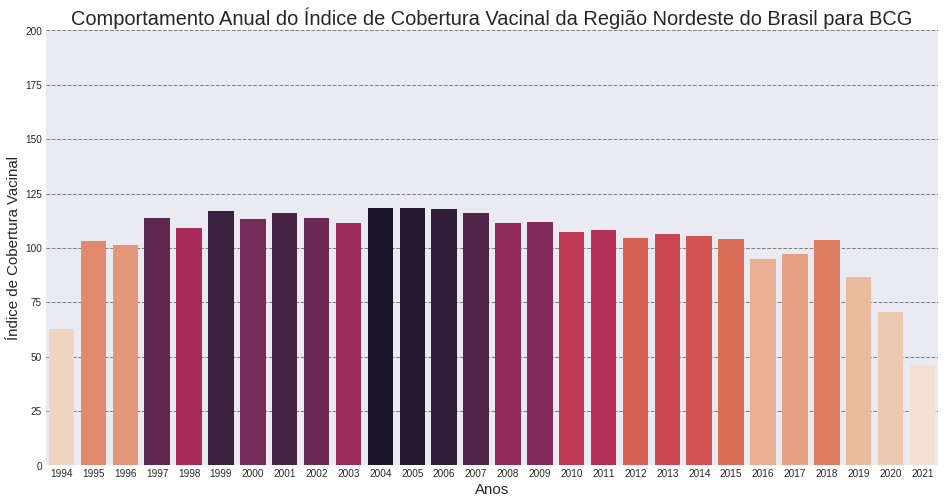

In [1151]:
plotar_regiao("Nordeste")

Os estados da região nordeste apresentam uma cobertura vacinal constante entre 80 a 130 com uma evidÊncia maior para o estado do Maranhão. A parit de 2016 os estados passam a apresentar uma queda no índice.

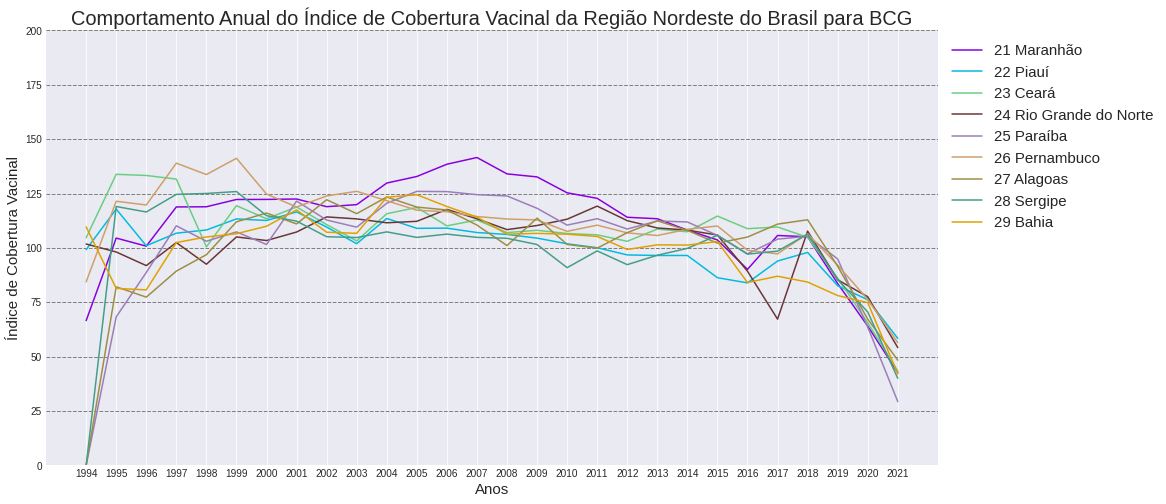

In [1152]:
plotar_estados("Nordeste")

#Região Centro Oeste
Desde 1996 a 2018 o Região se manteve com o índice de cobertura vacinal entre 100 a 125. A partir de 2018 os índices começam a cair.

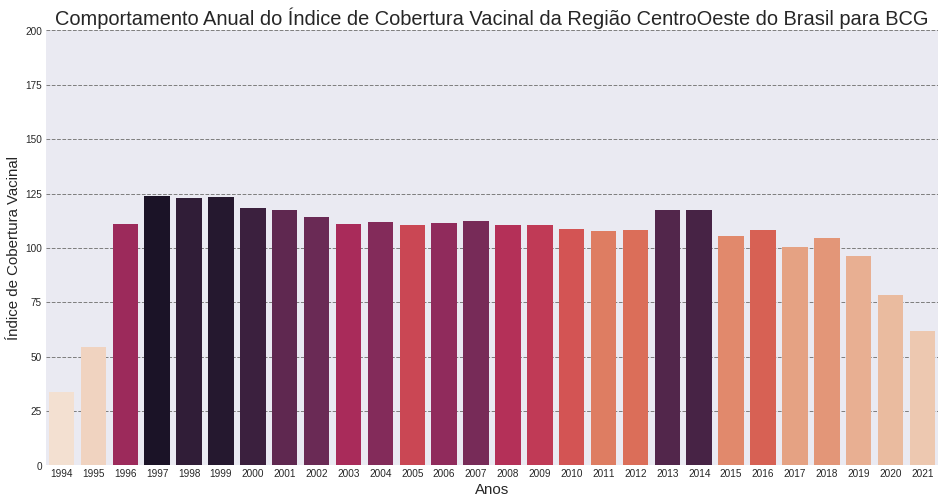

In [1159]:
plotar_regiao("CentroOeste")

Os estado oscilam bastante, pricipalmente o Distrito Federal que entre 1995 a 1999 tem seus índices entre 125 a 175. os outros estados tem um comportamento mais constante. A partir de 2018 todos os estados passam a ter queda.

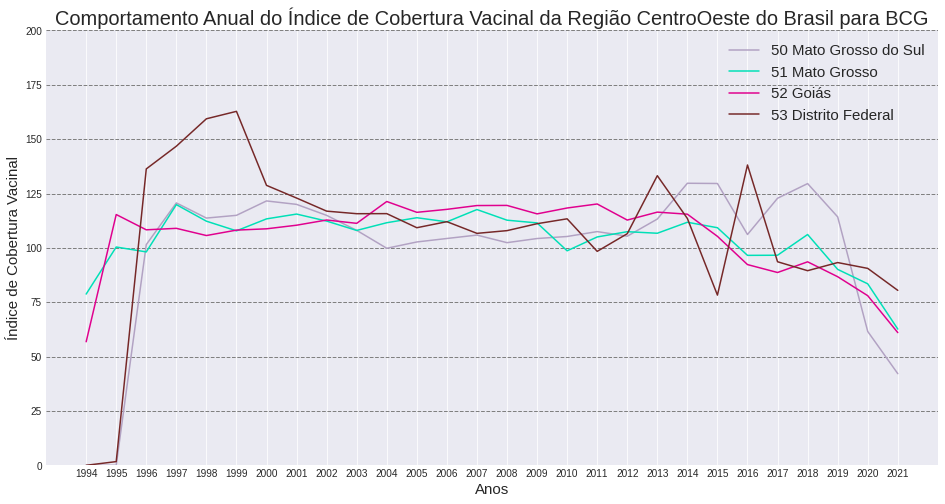

In [1155]:
plotar_estados("CentroOeste")

#Conclusão
Existe realmente uma queda na cobertura vacinal para BCG em todo o país, assim como foi analisado. 

Segundo o ministério da saúde, defvido a pandemia do Corona vírus houve uma queda na cobertura vacianal. Esta queda nas coberturas desafia o Programa Nacional de Imunizações do Sistema Único de Saúde, considerado um dos mais amplos e bem sucedidos do mundo. O programa teve um aumento expressivo nas taxas de vacinação entre 1980 e 1995, ano a partir do qual as taxas ficaram estáveis em patamares elevados, e, em alguns casos, superiores a 100%. **O recuo teve início em 2015**, e, antes da pandemia, já pesavam fatores como horários de funcionamento das unidades de saúde, a circulação de informações falsas sobre a segurança das vacinas e até mesmo a impressão de que as doenças imunopreveníveis já deixaram de existir.

https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/em-queda-ha-5-anos-coberturas-vacinais-preocupam-ministerio-da-saude

Abaixo uma tabela publicada pela DATASUS mostrando a situação das imunizações no Brasil. Na primeira linha a BCG

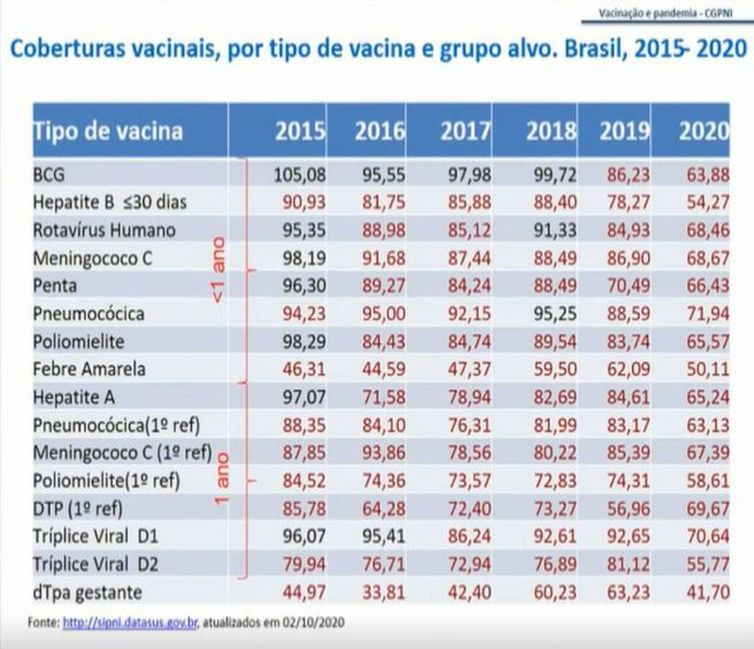